## Classification of Iris Flower using Logistic regression

### Import the necessary packages

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [64]:
df=pd.read_csv('IRIS.csv')

### Displaying the top rows of dataset

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Display the shape of the dataset

In [66]:
df.shape

(150, 5)

### Display the datatypes in the dataset

In [67]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### View the info of the data frame that contains details like the count of non-null variables and the column’s datatype along with the column names.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking for null values

In [69]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Display the statistical description of the dataset.

In [70]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To obtain a count of unique values in the 'species' column 

In [71]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualization


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

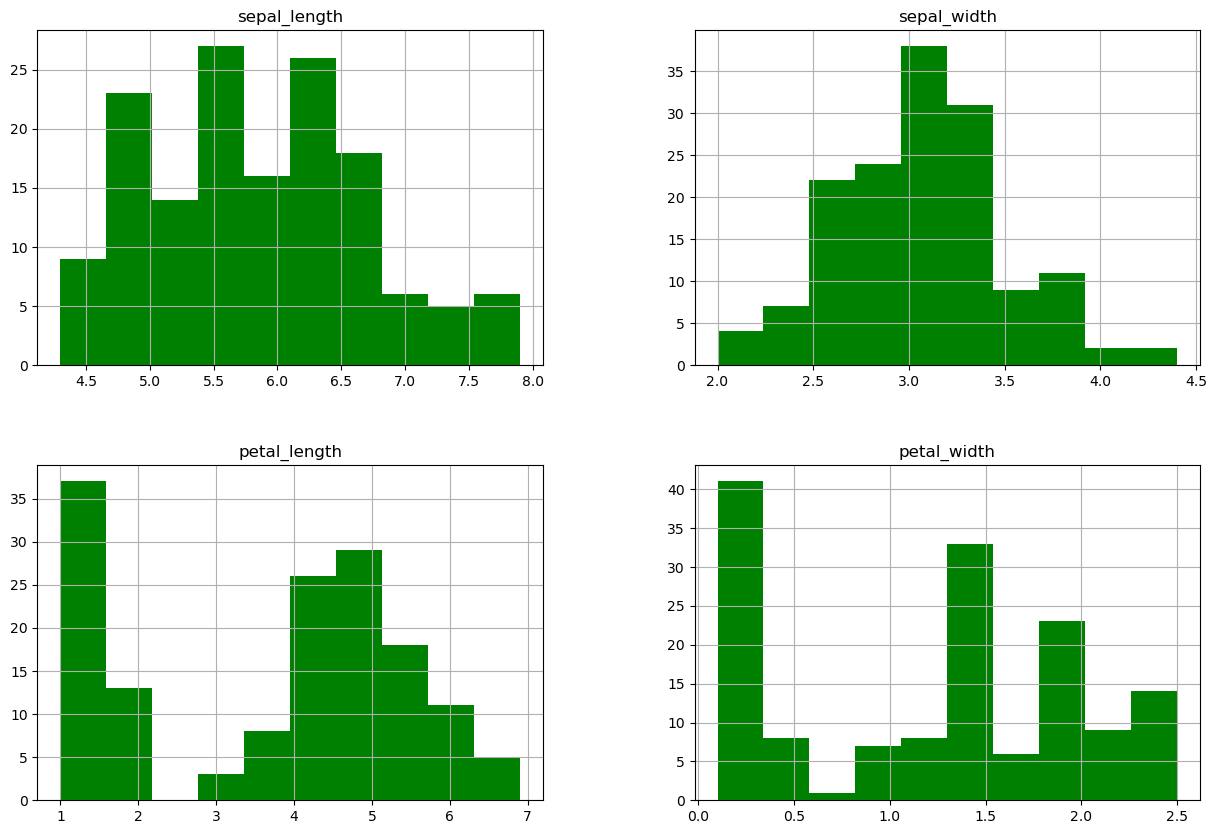

In [72]:
df.hist(figsize=(15,10),color='green')

<Figure size 640x480 with 0 Axes>

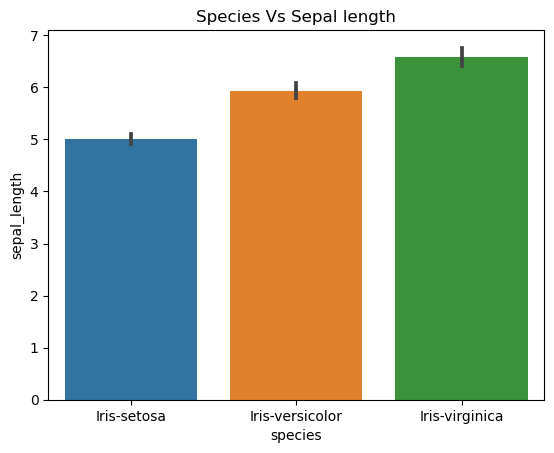

<Figure size 640x480 with 0 Axes>

In [73]:
sns.barplot(data=df,x='species',y='sepal_length')
plt.title("Species Vs Sepal length")
plt.figure()

<Figure size 640x480 with 0 Axes>

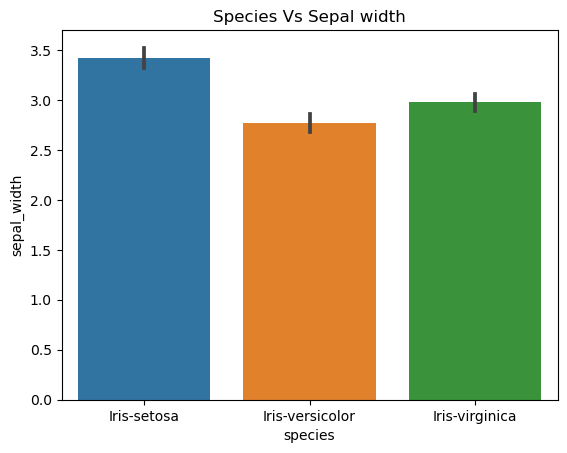

<Figure size 640x480 with 0 Axes>

In [74]:
sns.barplot(data=df,x='species',y='sepal_width')
plt.title("Species Vs Sepal width")
plt.figure()

<Figure size 640x480 with 0 Axes>

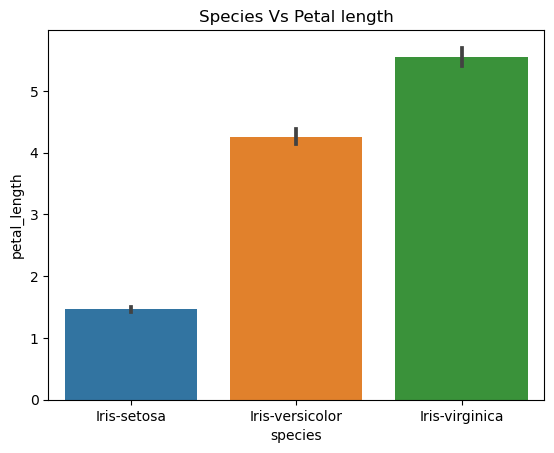

<Figure size 640x480 with 0 Axes>

In [75]:
sns.barplot(data=df,x='species',y='petal_length')
plt.title("Species Vs Petal length")
plt.figure()

<Figure size 640x480 with 0 Axes>

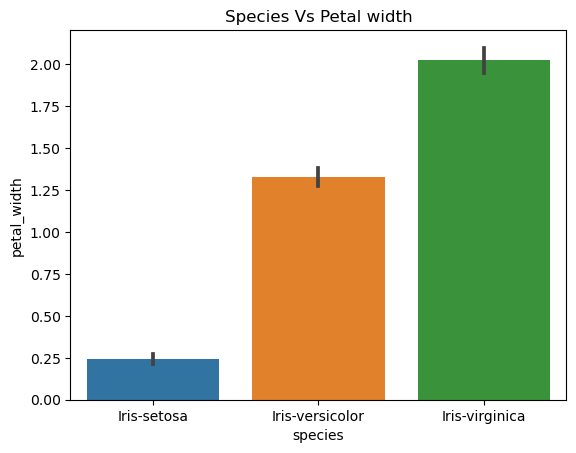

<Figure size 640x480 with 0 Axes>

In [76]:
sns.barplot(data=df,x='species',y='petal_width')
plt.title("Species Vs Petal width")
plt.figure()

### Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [78]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

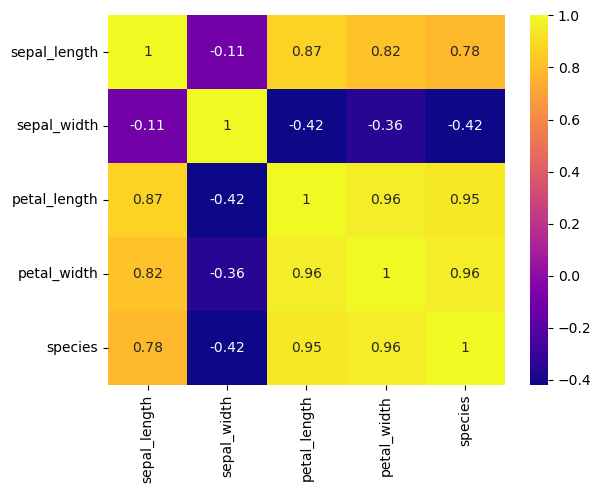

In [79]:
sns.heatmap(df.corr(),cmap='plasma',annot=True)

## Creating the model(classification)
### Fitting the Model and splitting the data into train and test datasets.

In [80]:
x = df.drop(['species'],axis=1)
y = df['species']

In [81]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [83]:
model.fit(x_train,y_train)

LogisticRegression()

In [84]:
model.score(x_train,y_train)

0.9809523809523809

In [85]:
model.score(x_test,y_test)

0.9777777777777777

### Evaluation-Find the accuracy of the model and view the confusion matrix. 

In [86]:
predictions=model.predict(x_test)

In [87]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

In [88]:
accuracy_score(y_test,predictions)

0.9777777777777777

<Axes: >

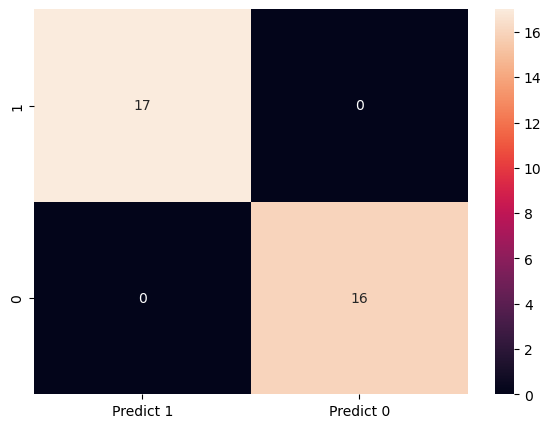

In [89]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [90]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Conclusion

In [91]:
accuracy=accuracy_score(y_test,predictions)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.78


### We can see that accuracy of the model is 97.78 percent which is very accurate.